# Interconnection Queues

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

## NYISO Interconnection Queue

The `get_interconnection_queue` call returns projects that are "active", "completed", and "withdrawn"

In [2]:
iso = gridstatus.NYISO()
queue = iso.get_interconnection_queue()
queue.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),...,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync Date,Last Updated Date,Z,S,Availability of Studies,SGIA Tender Date
0,0276,Homer Solar Energy Center,NaN,Cortland,NY,NaN,NM-NG,Solar,90.0,90.0,...,NaN,NaN,NaN,NaT,2023-09-01,9/30/2022,C,10.0,"FES, SRIS, FS",NaN
1,0393,Berrians East Replacement,NaN,Queens,NY,NaN,CONED,Dual Fuel,94.2,94.2,...,NaN,NaN,NaN,NaT,2024-08-01,6/30/2022,J,11.0,"FES, SRIS, FS",NaN
2,0396,Baron Winds,NaN,Steuben,NY,NaN,NYSEG,Wind,238.4,238.4,...,NaN,NaN,NaN,NaT,2022-11-29,12/31/2022,C,13.0,"FES, SRIS, FS",NaN
3,0396A,Wood Street Transformer,NaN,Putnam,NY,NaN,NYSEG,AC Transmission,0.0,NaN,...,NaN,NaN,NaN,NaT,NaT,4/30/2021,G,12.0,SIS,NaN
4,0422,Eight Point Wind Energy Center,NaN,Steuben-Allegany,NY,NaN,NYSEG,Wind,101.8,101.8,...,NaN,NaN,NaN,NaT,2022-11-01,3/31/2021,C,12.0,"FES, SRIS, FS",NaN


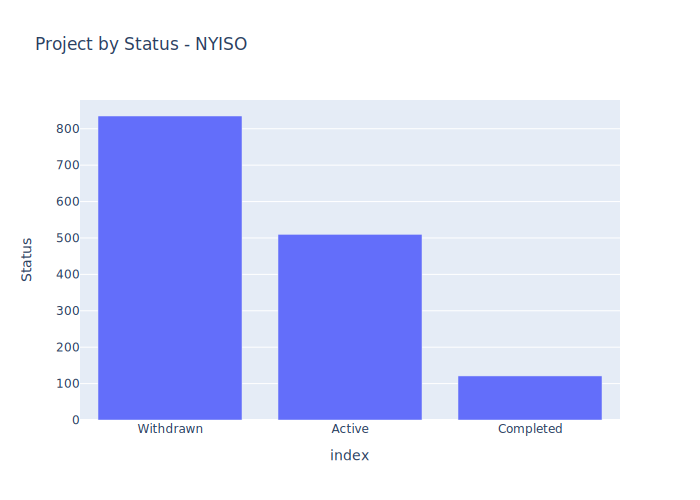

In [3]:
status_distributions = queue["Status"].value_counts()
fig = px.bar(
    status_distributions,
    x=status_distributions.index,
    y="Status",
    title="Project by Status - NYISO",
)
fig.show("svg")

## Days in Queue

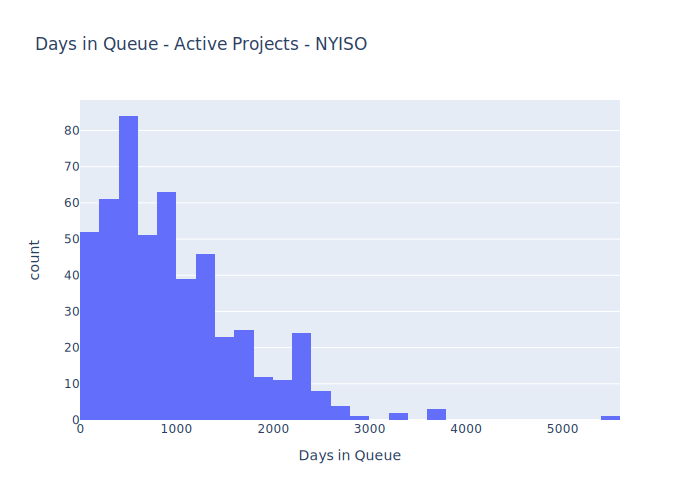

In [4]:
queue["Days in Queue"] = (pd.Timestamp.now() - queue["Queue Date"]).dt.days
active = queue[queue["Status"] == "Active"]
fig = px.histogram(
    active, x="Days in Queue", title="Days in Queue - Active Projects - NYISO"
)
fig.show("svg")

## Top Active Project Types

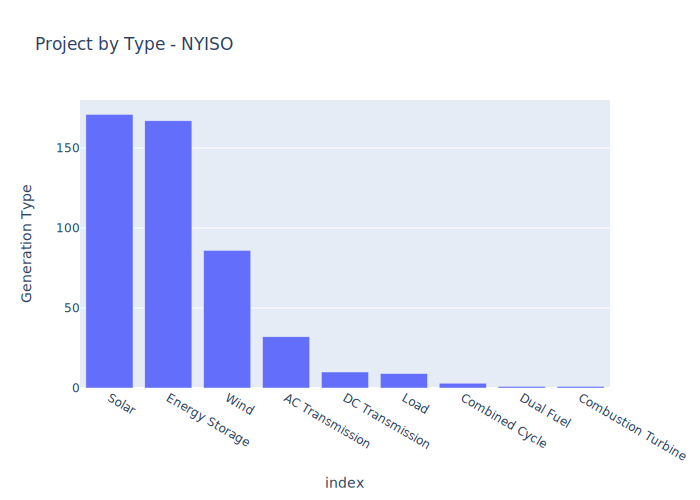

In [5]:
generation_types = active["Generation Type"].value_counts()
fig = px.bar(
    generation_types,
    x=generation_types.index,
    y="Generation Type",
    title="Project by Type - NYISO",
)
fig.show("svg")

## Proposed Completion Date

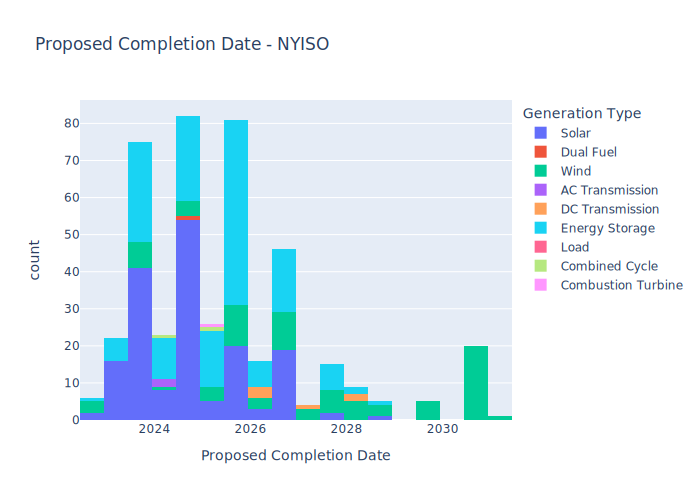

In [6]:
fig = px.histogram(
    active,
    x="Proposed Completion Date",
    title="Proposed Completion Date - NYISO",
    color="Generation Type",
)
fig.show("svg")

## Get Interconnection Queue Data from All ISOs

In [7]:
all_queues = gridstatus.get_interconnection_queues()
all_queues

 29%|██▊       | 2/7 [00:03<00:10,  2.14s/it]

In [ ]:
all_queues["Status"].value_counts()

Withdrawn                                    7405
Active                                       6431
WITHDRAWN                                    1481
In Service                                   1028
Completed                                     751
Done                                          746
ACTIVE                                        594
Engineering and Procurement                   301
Confirmed                                     223
COMPLETED                                     199
Retracted                                     131
Suspended                                      74
Under Construction                             58
Deactivated                                    54
Partially in Service - Under Construction      46
Annulled                                       24
Withdrawn - Pending Cure                        2
                                                1
Name: Status, dtype: int64